In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
from tensorflow.keras import layers, models

In 2 : dataset

In [14]:
data_dir = r"C:/Users/VACB/OneDrive/Desktop/viemphoi/archive/chest_xray"
train_dir = r"C:/Users/VACB/OneDrive/Desktop/viemphoi/archive/chest_xray/train"
val_dir   = r"C:/Users/VACB/OneDrive/Desktop/viemphoi/archive/chest_xray/val"
test_dir  = r"C:/Users/VACB/OneDrive/Desktop/viemphoi/archive/chest_xray/test"

In3:Data Augmentation & chuẩn hóa

In [16]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

In 4: load ảnh

In [17]:
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=32,
    shuffle=True
)

val_gen = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

test_gen = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 47 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In 5: CNN

In [18]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,1)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
model.summary()

c:\Users\VACB\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,827,905 (18.42 MB)

 Trainable params: 4,827,905 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In 6 : Compile mô hình

In [19]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In 7: Callback giảm learning rate

In [20]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=2,
    factor=0.3,
    min_lr=1e-6
)

In 8 : huấn luyện

In [21]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,                  
    callbacks=[lr_reduction]
)

c:\Users\VACB\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 32s 192ms/step - accuracy: 0.7866 - loss: 0.4565 - val_accuracy: 0.8511 - val_loss: 0.3819 - learning_rate: 0.0010
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 26s 162ms/step - accuracy: 0.8625 - loss: 0.3195 - val_accuracy: 0.6383 - val_loss: 0.7250 - learning_rate: 0.0010
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 30s 182ms/step - accuracy: 0.8788 - loss: 0.2789 - val_accuracy: 0.8936 - val_loss: 0.3609 - learning_rate: 0.0010
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 32s 196ms/step - accuracy: 0.9011 - loss: 0.2386 - val_accuracy: 0.8298 - val_loss: 0.3612 - learning_rate: 0.0010
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 26s 159ms/step - accuracy: 0.9093 - loss: 0.2208 - val_accuracy: 0.8936 - val_loss: 0.2842 - learning_rate: 0.0010
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 30s 183ms/step - accuracy: 0.9245 - loss: 0.1932 - val_accuracy: 0.9149 - val_loss: 0.2667 - learning_rate: 3.0000e-04
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 27s 167ms/step - accuracy:

Đồ thị loss- acc

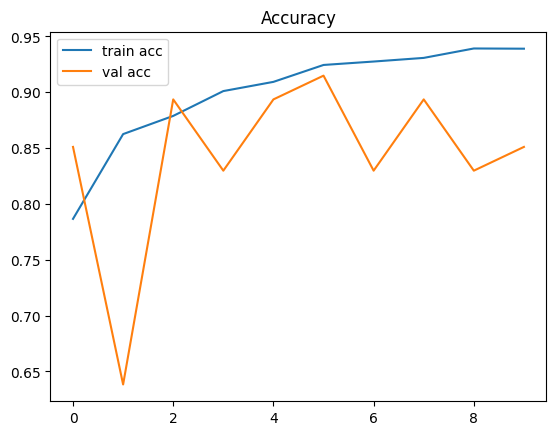

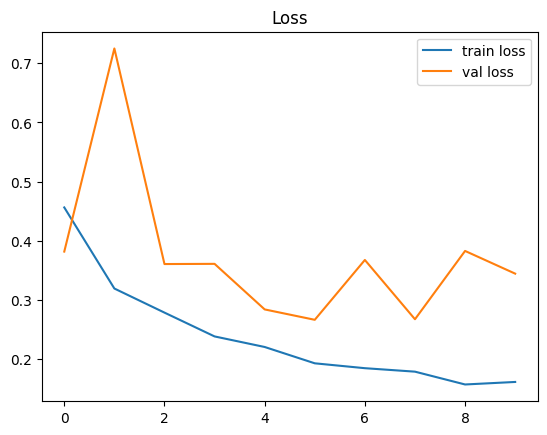

In [22]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()


đánh giá mô hình

In [23]:
test_loss, test_acc = model.evaluate(test_gen)
print("Test Accuracy: {:.2f}%".format(test_acc * 100))

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 269ms/step - accuracy: 0.9022 - loss: 0.3231
Test Accuracy: 90.22%


Test Accuracy: 90.22%  |  Test Loss: 0.3231

Classification report:
               precision    recall  f1-score   support

      NORMAL     0.9626    0.7692    0.8551       234
   PNEUMONIA     0.8764    0.9821    0.9262       390

    accuracy                         0.9022       624
   macro avg     0.9195    0.8756    0.8907       624
weighted avg     0.9087    0.9022    0.8996       624



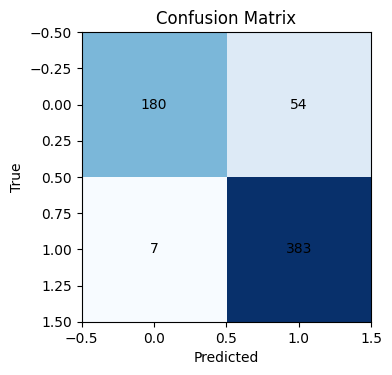

ROC-AUC: 0.9638


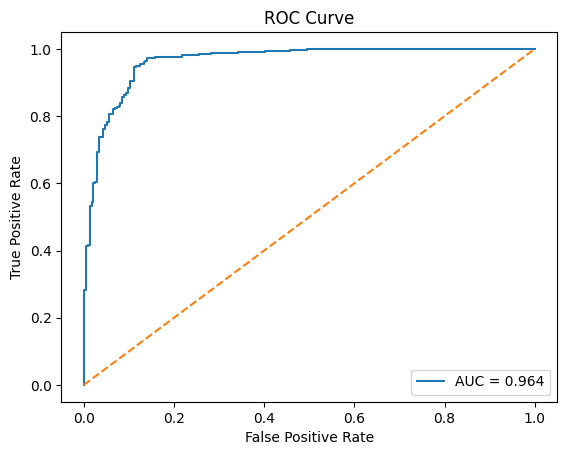

In [24]:
# ==== 1) ĐÁNH GIÁ TRÊN TEST SET ====
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Đảm bảo thứ tự mẫu ổn định
test_gen.reset()

# a) Evaluate nhanh (loss, acc)
test_loss, test_acc = model.evaluate(test_gen, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%  |  Test Loss: {test_loss:.4f}")

# b) Lấy xác suất dự đoán
y_prob = model.predict(test_gen, verbose=0).ravel()   # xác suất thuộc lớp 1 (PNEUMONIA)
y_true = test_gen.classes                              # nhãn thật 0/1 theo class_indices
y_pred = (y_prob >= 0.5).astype(int)                  # ngưỡng 0.5

# c) Báo cáo chi tiết
target_names = [k for k, v in sorted(test_gen.class_indices.items(), key=lambda x: x[1])]
print("\nClassification report:\n", classification_report(y_true, y_pred, target_names=target_names, digits=4))

# d) Ma trận nhầm lẫn
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(4,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
for (i, j), v in np.ndenumerate(cm):
    plt.text(j, i, str(v), ha="center", va="center")
plt.tight_layout()
plt.show()

# e) ROC-AUC (tham khảo thêm về ngưỡng)
try:
    auc = roc_auc_score(y_true, y_prob)
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    print(f"ROC-AUC: {auc:.4f}")
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0,1], [0,1], linestyle="--")
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate"); plt.title("ROC Curve"); plt.legend()
    plt.show()
except Exception as e:
    print("Không tính được ROC-AUC:", e)

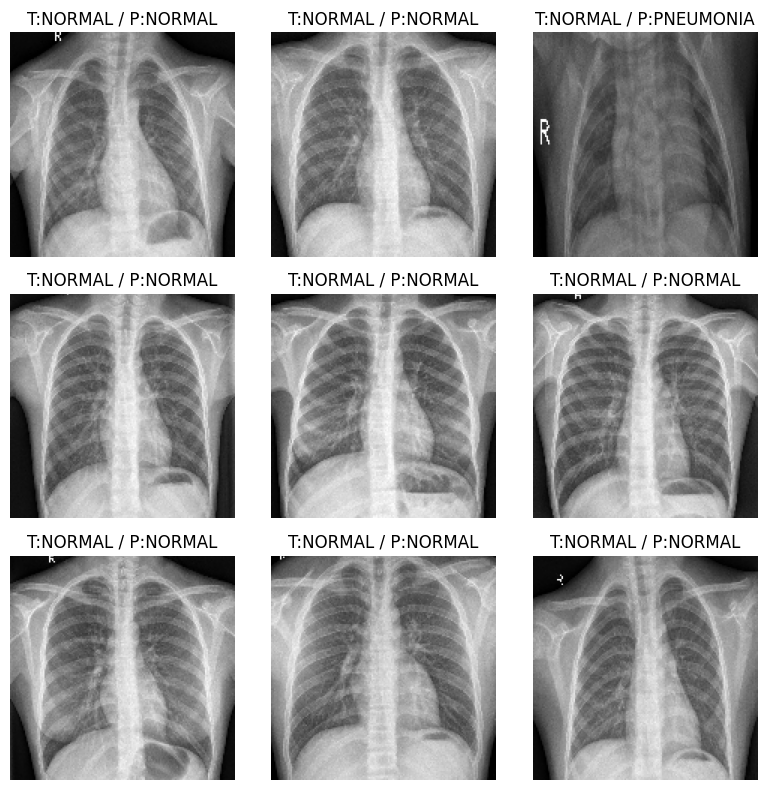

In [25]:
# ==== 2) XEM VÀI ẢNH TEST + DỰ ĐOÁN ====
# Hiển thị ngẫu nhiên 9 ảnh từ test set kèm nhãn thật & dự đoán
import random
test_gen.reset()
x_batch, y_batch = next(test_gen)  # lấy 1 batch đầu (hoặc random index từ toàn bộ cũng được)

# dự đoán xác suất cho batch
batch_prob = model.predict(x_batch, verbose=0).ravel()
batch_pred = (batch_prob >= 0.5).astype(int)

class_names = [k for k, v in sorted(test_gen.class_indices.items(), key=lambda x: x[1])]

plt.figure(figsize=(8,8))
idxs = random.sample(range(len(x_batch)), k=min(9, len(x_batch)))
for i, idx in enumerate(idxs):
    plt.subplot(3,3,i+1)
    # nếu ảnh grayscale (1 kênh) thì squeeze kênh cuối để hiển thị
    img = x_batch[idx]
    if img.shape[-1] == 1:
        plt.imshow(img.squeeze(), cmap='gray')
    else:
        plt.imshow(img)
    true_lbl = class_names[int(y_batch[idx])]
    pred_lbl = class_names[int(batch_pred[idx])]
    plt.title(f"T:{true_lbl} / P:{pred_lbl}")
    plt.axis("off")
plt.tight_layout(); plt.show()

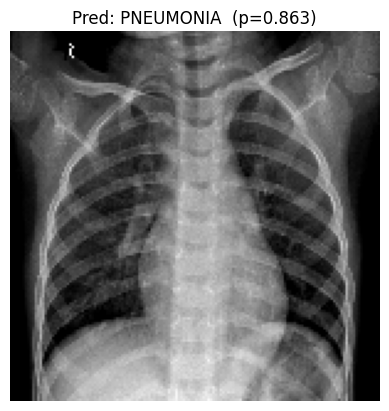

Dự đoán: PNEUMONIA  |  Xác suất (lớp 1 - PNEUMONIA): 0.8631


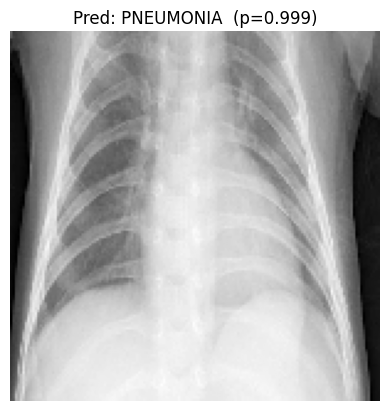

Dự đoán: PNEUMONIA  |  Xác suất (lớp 1 - PNEUMONIA): 0.9988


('PNEUMONIA', 0.9987819194793701)

In [38]:
# ==== 3) DỰ ĐOÁN ẢNH ĐƠN LẺ (từ đường dẫn) ====
from tensorflow.keras.preprocessing import image

def predict_image(img_path, target_size=(150,150), grayscale=True, threshold=0.5):
    # đọc ảnh
    color_mode = 'grayscale' if grayscale else 'rgb'
    img = image.load_img(img_path, target_size=target_size, color_mode=color_mode)
    x = image.img_to_array(img) / 255.0
    x = np.expand_dims(x, axis=0)

    prob = float(model.predict(x, verbose=0)[0][0])
    pred = int(prob >= threshold)

    # tên lớp theo mapping của generator
    idx2class = {v:k for k,v in test_gen.class_indices.items()}
    label = idx2class[pred]

    # hiển thị
    plt.imshow(img if not grayscale else np.squeeze(x[0]), cmap='gray' if grayscale else None)
    plt.title(f"Pred: {label}  (p={prob:.3f})")
    plt.axis('off'); plt.show()

    print(f"Dự đoán: {label}  |  Xác suất (lớp 1 - {idx2class[1]}): {prob:.4f}")
    return label, prob

# Ví dụ:
predict_image(r"C:/Users/VACB/OneDrive/Desktop/viemphoi/archive/chest_xray/vacb_random/NORMAL2-IM-1440-0001.jpeg",
              target_size=(150,150), grayscale=True)
predict_image(r"C:/Users/VACB/OneDrive/Desktop/viemphoi/archive/chest_xray/vacb_random/person11_bacteria_45.jpeg",
              target_size=(150,150), grayscale=True)